## 多项式回归

当训练数据是非线性时，可以考虑多项式回归。

### 准备数据

为了便于直观绘图，我们选择只有一个特征的线性样本。预测值 $y$ 和特征 $x$ 的关系如下：

$$ y = 0.5x^2 + x + 2 + 噪音 $$

如果不考虑噪音，通过线性回归，应该得到：二次项系数为0.5，一次项系数为1，偏移量为2。

下面画出所有样本点 $(x^{i}, y^{i})$：

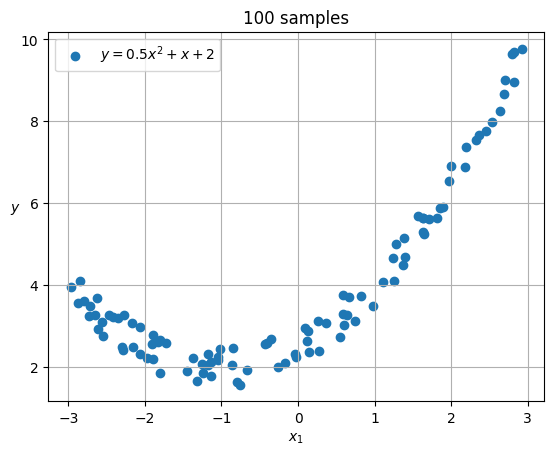

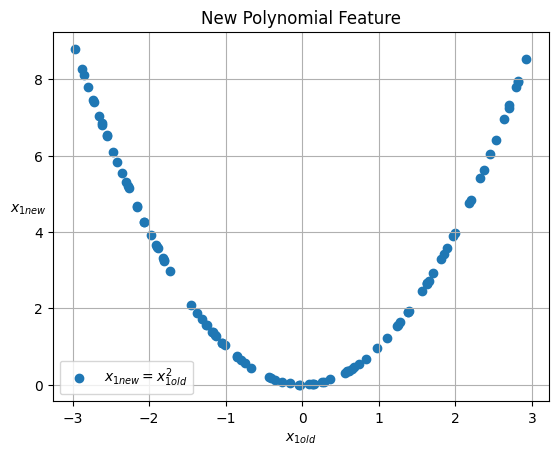

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(42)

# 100个训练数据
X1_train = 6 * np.random.rand(100, 1) - 3
y_train = 0.5 * X1_train**2 + X1_train + 2 + np.random.rand(100, 1)

# 让训练集中每个特征的平方作为新特征
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X1_train)

# 绘制训练数据点
fig, ax = plt.subplots()
ax.scatter(X1_train, y_train, label='$y=0.5x^2+x+2$')
ax.set_title("100 samples")
ax.set_xlabel("$x_1$")
ax.set_ylabel("$y$", rotation=0)
ax.legend()
ax.grid()

# 绘制新特征和旧特征的关系
fig, ax = plt.subplots()
ax.scatter(X_poly[:,0], X_poly[:,1], label='$x_{1new}=x_{1old}^2$')
ax.set_title("New Polynomial Feature")
ax.set_xlabel("$x_{1old}$")
ax.set_ylabel("$x_{1new}$", rotation=0)
ax.legend()
ax.grid()

### 训练数据

`X_poly`现在包含原始特征`X`并加上了这个特征的平方`X^2`。现在可以在这个扩展训练集上使用`LinearRegression`模型了。

Poly Reg: y=0.5x^2 + 0.99x + 2.5


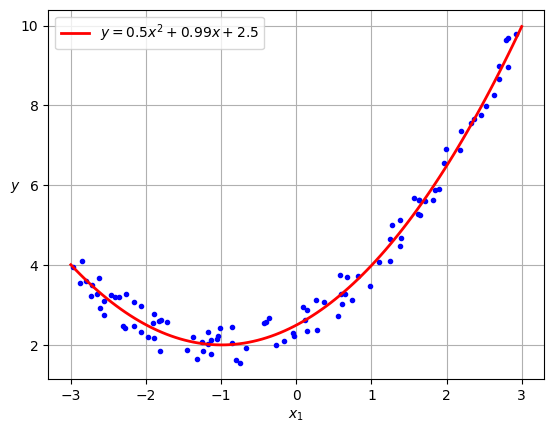

In [13]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train)

coef2 = round(lin_reg.coef_[0][1], 2)
coef1 = round(lin_reg.coef_[0][0], 2)
coef0 = round(lin_reg.intercept_[0], 2)
print(f'Poly Reg: y={coef2}x^2 + {coef1}x + {coef0}')

X1_test = np.linspace(-3, 3, 100).reshape(100, 1)
X_test = poly_features.transform(X1_test)
y_test = lin_reg.predict(X_test)

fig, ax = plt.subplots()
ax.plot(X1_train, y_train, "b.")
ax.plot(X1_test, y_test, "r-", linewidth=2, label=f"$y={coef2}x^2+{coef1}x+{coef0}$")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.grid()